## MAFS6010Z Artificial Intelligence in Fintech
<br>

#### TANG Tsz Hong 20735194
#### LAM Chung Wai 20430732
#### CHAN Koon Lam 20748995

<br>

### Project 3 (final project)   CODE

- [Data preprocessing](#point1)
    - [calendar.csv](#point1a)
    - [sell_prices.csv](#point1b)
    - [sales_train_evaluation.csv](#point1c)
    - [join eval and cal and price](#point1d)
- [Feature Engineering](#point2)
    - [adding more features](#point2a)
    - [Exploratory Data Analysis (EDA)](#point2b)
- [Model](#point3)
    - [Accuracy](#point3a)
    - [Uncertainty](#point3b)

## Data preprocessing <a name="point1"></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Information about the dates on which the products are sold
df_calendar = pd.read_csv('calendar.csv')

### Sales [d_1 - d_1941] (labels used for the Public leaderboard)
df_evaluation = pd.read_csv('sales_train_evaluation.csv')

### Historical daily unit sales data per product and store
df_validation = pd.read_csv('sales_train_validation.csv')

### Information about the price of the products sold per store and date
df_price = pd.read_csv('sell_prices.csv')

### Correct format for submissions
df_sample_output = pd.read_csv('sample_submission1.csv')

## calendar.csv <a name="point1a"></a>

In [3]:
#check what is included in some important columns

In [4]:
df_calendar.weekday.unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [5]:
### event_type_1
df_calendar.event_type_1.unique()

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

In [6]:
### Sports events (holidays)
df_calendar['event_name_1'][df_calendar['event_type_1'] == 'Sporting'].unique()

array(['SuperBowl', 'NBAFinalsStart', 'NBAFinalsEnd'], dtype=object)

In [7]:
### Cultural events (holidays)
df_calendar['event_name_1'][df_calendar['event_type_1'] == 'Cultural'].unique()

array(['ValentinesDay', 'StPatricksDay', 'Cinco De Mayo', "Mother's day",
       "Father's day", 'Halloween', 'Easter'], dtype=object)

In [8]:
### National events (holidays)
df_calendar['event_name_1'][df_calendar['event_type_1'] == 'National'].unique()

array(['PresidentsDay', 'MemorialDay', 'IndependenceDay', 'LaborDay',
       'ColumbusDay', 'VeteransDay', 'Thanksgiving', 'Christmas',
       'NewYear', 'MartinLutherKingDay'], dtype=object)

In [9]:
### Religious events (holidays)
df_calendar['event_name_1'][df_calendar['event_type_1'] == 'Religious'].unique()

array(['LentStart', 'LentWeek2', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Ramadan starts', 'Eid al-Fitr', 'EidAlAdha',
       'Chanukah End', 'OrthodoxChristmas'], dtype=object)

In [10]:
### Official / public / federal holidays (U.S.)
holiday = ['SuperBowl', 'Cinco De Mayo', "Mother's day", "Father's day", 'Easter', 
           'PresidentsDay', 'MemorialDay', 'IndependenceDay', 'LaborDay', 'ColumbusDay', 
           'VeteransDay', 'Thanksgiving', 'Christmas', 'NewYear', 'MartinLutherKingDay'
          ]
weekend = ['Saturday', 'Sunday']

def is_holiday(event_name):
    col = []
    for i in range(len(event_name)):
        if event_name[i] in holiday:
            col.append(1)
        else:
            col.append(0)
    
    return col

def is_weekend(weekday):
    col = []
    for i in range(len(weekday)):
        if weekday[i] in weekend:
            col.append(1)
        else:
            col.append(0)
    
    return col

In [11]:
### Categorical column for weekend
df_calendar['weekend'] = is_weekend(df_calendar['weekday'])

In [12]:
### Categorical column for holidays
df_calendar['holiday_1'] = is_holiday(df_calendar['event_name_1'])
df_calendar['holiday_2'] = is_holiday(df_calendar['event_name_2'])

df_calendar['holiday'] = df_calendar['holiday_1'] + df_calendar['holiday_2']
df_calendar['holiday'][df_calendar['holiday'] >=1] = 1

<ipython-input-12-8a654707a0f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar['holiday'][df_calendar['holiday'] >=1] = 1


In [13]:
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,weekend,holiday_1,holiday_2,holiday
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0


In [14]:
#df_calendar = df_calendar.drop(['weekday', 'wday', 'month', 'year', 
#                                'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'], axis='columns')

In [15]:
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,weekend,holiday_1,holiday_2,holiday
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0


## sell_prices.csv <a name="point1b"></a>

In [16]:
df_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [17]:
df_price.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


## sales_train_evaluation.csv <a name="point1c"></a>

In [18]:
df_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [19]:
### Dimension reduction (reverse of pivot table)
#col_drop = []
#firstDay = 350 # 1852?

#for x in range(firstDay-1):
#    col_drop.append('d_' + str(x+1))

In [20]:
#df_evaluation = df_evaluation.drop(col_drop, axis='columns')

In [21]:
df_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


## join eval and cal and price <a name="point1d"></a>

In [22]:
df_evaluation = df_evaluation.melt(['id','item_id','dept_id','cat_id','store_id','state_id'], 
                                   var_name = 'd', 
                                   value_name = 'quantity')
print(df_evaluation.shape)
df_evaluation.head()

(59181090, 8)


,id,item_id,dept_id,cat_id,store_id,state_id,d,quantity
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [23]:
### left join by 'd' (use only keys from df_evaluation)
df_evaluation = pd.merge(df_evaluation, df_calendar, how = 'left', on = 'd')
df_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,quantity,date,wm_yr_wk,...,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,weekend,holiday_1,holiday_2,holiday
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,NaN,0,0,0,1,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,NaN,0,0,0,1,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,NaN,0,0,0,1,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,NaN,0,0,0,1,0,0,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,NaN,0,0,0,1,0,0,0


In [24]:
df_evaluation.isna().sum()

id                     0
item_id                0
dept_id                0
cat_id                 0
store_id               0
state_id               0
d                      0
quantity               0
date                   0
wm_yr_wk               0
weekday                0
wday                   0
month                  0
year                   0
event_name_1    54363670
event_type_1    54363670
event_name_2    59059130
event_type_2    59059130
snap_CA                0
snap_TX                0
snap_WI                0
weekend                0
holiday_1              0
holiday_2              0
holiday                0
dtype: int64

In [25]:
### left join by 'item_id', 'wm_yr_wk', 'store_id'
df_evaluation = pd.merge(df_evaluation, df_price, how = 'left', on = ['item_id', 'wm_yr_wk', 'store_id'])
df_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,quantity,date,wm_yr_wk,...,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,weekend,holiday_1,holiday_2,holiday,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,1,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,1,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,1,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,1,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,1,0,0,0,NaN


In [26]:
df_evaluation.shape

(59181090, 26)

In [27]:
df_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,quantity,date,wm_yr_wk,...,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,weekend,holiday_1,holiday_2,holiday,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,1,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,1,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,1,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,1,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,0,0,0,1,0,0,0,NaN


In [28]:
df_evaluation.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'quantity', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'weekend', 'holiday_1', 'holiday_2',
       'holiday', 'sell_price'],
      dtype='object')

## Feature Enginnering <a name="point2"></a>

## adding more features <a name="point2a"></a>

In [30]:
#~20 mins

#date related
df_evaluation['year']=df_evaluation['date'].str[:4].astype(int)
df_evaluation['month']=df_evaluation['date'].str[5:7].astype(int)
df_evaluation['day']=df_evaluation['date'].str[8:10].astype(int)
df_evaluation['week']=(df_evaluation['wm_yr_wk']%100).astype(int)
#df_evaluation['weekend']  already included
df_evaluation['week_from_day0']=df_evaluation['wm_yr_wk'].rank(method='dense')

#holiday related
df_evaluation['christmas']=(df_evaluation['date'].str[5:10]=='12-25').astype(int)
df_evaluation['newyearseve']=(df_evaluation['date'].str[5:10]=='12-31').astype(int)
#df_evaluation['holiday'] already included
df_evaluation['holidayinweekday']=df_evaluation['holiday']*((df_evaluation['weekend']-1)*-1)
df_evaluation['blackfriday']=( (df_evaluation['d']=='d_301')|(df_evaluation['d']=='d_664')|(df_evaluation['d']=='d_1036')
                             |(df_evaluation['d']=='d_1400')|(df_evaluation['d']=='d_1764') ).astype(int)
df_evaluation['mothersday']=( (df_evaluation['d']=='d_100')|(df_evaluation['d']=='d_471')|(df_evaluation['d']=='d_835')
                             |(df_evaluation['d']=='d_1199')|(df_evaluation['d']=='d_1563')|(df_evaluation['d']=='d_1927') ).astype(int)


#sales related
df_evaluation['sales']=df_evaluation['quantity']*df_evaluation['sell_price']


#lag related
for size in [7, 30, 60, 90, 180]:
    df_evaluation[f"{size}_rolling_mean"] = df_evaluation.groupby(by="id")["sales"].transform(lambda x: x.shift(28).rolling(size).mean())

for size in [7, 30, 60, 90, 180]:
    df_evaluation[f"{size}_rolling_std"] = df_evaluation.groupby(by="id")["sales"].transform(lambda x: x.shift(28).rolling(size).std())


In [134]:
df_evaluation[df_evaluation['d']=='d_400'].head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,quantity,date,wm_yr_wk,...,7_rolling_mean,30_rolling_mean,60_rolling_mean,90_rolling_mean,180_rolling_mean,7_rolling_std,30_rolling_std,60_rolling_std,90_rolling_std,180_rolling_std
12165510,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_400,0,2012-03-03,11206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12165511,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_400,0,2012-03-03,11206,...,1.134286,0.926333,1.852667,1.367444,1.235111,1.937162,1.707827,3.224967,2.801601,2.347330
12165512,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_400,0,2012-03-03,11206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12165513,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_400,0,2012-03-03,11206,...,6.200000,7.667333,6.727000,6.799333,7.305667,3.414694,7.952357,7.513915,6.855972,6.888544
12165514,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_400,0,2012-03-03,11206,...,1.702857,1.802667,2.554667,2.612444,3.322556,2.908182,3.078987,4.095262,3.770111,4.881633


## Exploratory Data Analysis (EDA)  <a name="point2b"></a>

In [31]:
#d_1941 == 2016-05-22 last day

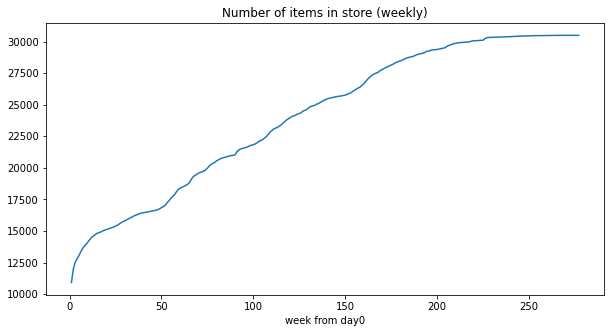

In [82]:
plt.figure(figsize=(10,5))
plt.title("Number of items in store (weekly)")
plt.xlabel('week from day0')
plt.plot(df_evaluation.groupby(by='week_from_day0')['sell_price'].count().iloc[0:277]/7)

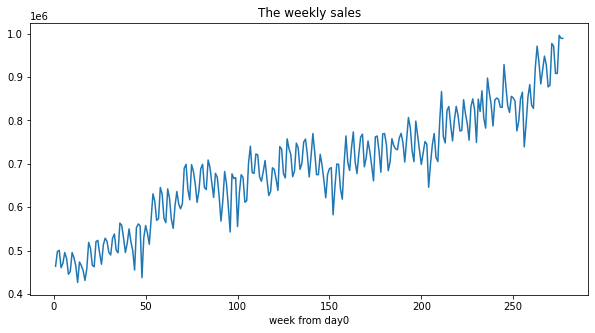

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("The weekly sales")
plt.xlabel('week from day0')
plt.plot(df_evaluation.groupby(by='week_from_day0')['sales'].sum().iloc[0:277])

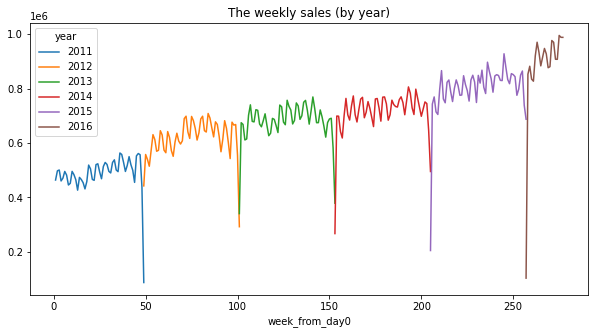

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("The weekly sales (by year)")
df_evaluation.groupby(['week_from_day0','year'])['sales'].sum().unstack('year').iloc[0:277].plot(ax=ax)

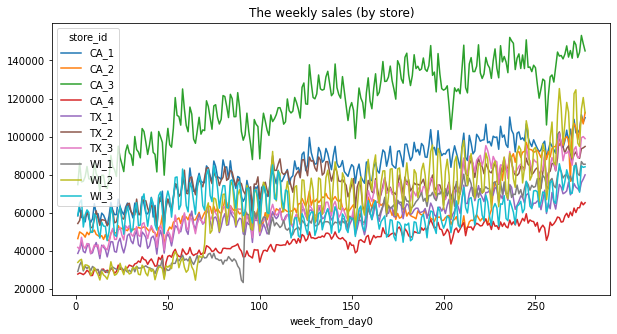

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("The weekly sales (by store)")
df_evaluation.groupby(['week_from_day0','store_id'])['sales'].sum().unstack('store_id').iloc[0:277].plot(ax=ax)

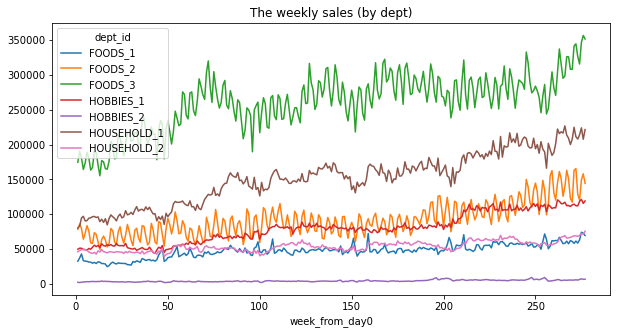

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("The weekly sales (by dept)")
df_evaluation.groupby(['week_from_day0','dept_id'])['sales'].sum().unstack('dept_id').iloc[0:277].plot(ax=ax)

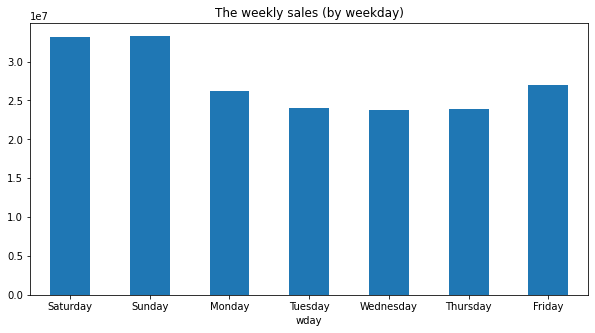

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("The weekly sales (by weekday)")
df_evaluation.groupby(['wday'])['sales'].sum().iloc[0:277].plot.bar(ax=ax)
ax.set_xticklabels( ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation= 0 )
plt.show()

## Model  <a name="point3"></a>

## Accuracy  <a name="point3a"></a>

In [38]:
#d_1941 == 2016-05-22 last day
X_train = df_evaluation[df_evaluation['date'] <= '2016-03-27']
y_train = X_train['quantity']
X_val = df_evaluation[(df_evaluation['date'] > '2016-03-27') & (df_evaluation['date'] <= '2016-04-24')]
y_val = X_val['quantity']
X_test = df_evaluation[(df_evaluation['date'] > '2016-04-24')]
y_test = X_test['quantity']

In [39]:
features = ["snap_CA",
            "snap_TX",
            "snap_WI",
            "sell_price",
            #
            "year",
            "month",
            "day",
            "week",
            "week_from_day0",
            #
            "christmas",
            "newyearseve",
            #
            "sales",
            #
            "7_rolling_mean",
            "30_rolling_mean",
            "60_rolling_mean",
            "90_rolling_mean",
            "180_rolling_mean",
            "7_rolling_std",
            "30_rolling_std",
            "60_rolling_std",
            "90_rolling_std",
            "180_rolling_std"
           ]

In [40]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train[features], y_train)
lgb_test = lgb.Dataset(X_test[features], y_test)

### Hyperparameters tuning
params = {'boosting_type': 'gbdt',
          'metric': 'rmse',
          'objective': 'regression',
          'n_jobs': -1,
          'seed': 23,
          'learning_rate': 0.005,
          'bagging_fraction': 0.75,
          'bagging_freq': 10, 
          'colsample_bytree': 0.75, 
          'force_col_wise': True
         }

model = lgb.train(params, lgb_train, num_boost_round = 2500, early_stopping_rounds = 50, 
                  valid_sets = [lgb_train, lgb_test], verbose_eval = 100
                 )

#>30 mins

[LightGBM] [Info] Total Bins 3419
[LightGBM] [Info] Number of data points in the train set: 57473650, number of used features: 22
[LightGBM] [Info] Start training from score 1.122458
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 1.94876	valid_1's rmse: 1.74059
[200]	training's rmse: 1.14769	valid_1's rmse: 0.97935
[300]	training's rmse: 0.878051	valid_1's rmse: 0.72835
[400]	training's rmse: 0.773069	valid_1's rmse: 0.63287
[500]	training's rmse: 0.724149	valid_1's rmse: 0.585274
[600]	training's rmse: 0.697612	valid_1's rmse: 0.562227
[700]	training's rmse: 0.68143	valid_1's rmse: 0.547788
[800]	training's rmse: 0.67	valid_1's rmse: 0.539387
[900]	training's rmse: 0.661043	valid_1's rmse: 0.532554
[1000]	training's rmse: 0.654005	valid_1's rmse: 0.527368
[1100]	training's rmse: 0.647151	valid_1's rmse: 0.521414
[1200]	training's rmse: 0.641315	valid_1's rmse: 0.515694
[1300]	training's rmse: 0.636396	valid_1's rmse: 0.511056
Early stopping, best i

In [41]:
#prediction to csv

#valid
X_val['pred_quantity'] = model.predict(X_val[features])
validation = X_val[['id', 'date', 'pred_quantity']]
validation = pd.pivot(validation, index = 'id', columns = 'date', values = 'pred_quantity').reset_index()
validation.columns = ['id'] + ['F' + str(i + 1) for i in range(28)]
validation['id'] = validation['id'].apply(lambda x: x.replace('evaluation', 'validation'))

#evaluation (test)
X_test['pred_quantity'] = model.predict(X_test[features])
evaluation = X_test[['id', 'date', 'pred_quantity']]
evaluation = pd.pivot(evaluation, index = 'id', columns = 'date', values = 'pred_quantity').reset_index()
#predictions_df = predictions_df.drop(predictions_df.columns[1], axis=1)
evaluation.columns = ['id'] + ['F' + str(i + 1) for i in range(28)]

#final
final = pd.concat([evaluation, validation]).reset_index(drop=True)
#final.to_csv('submission_4.csv', index = False)
final

<ipython-input-41-6d2e881ad90f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['pred_quantity'] = model.predict(X_val[features])
<ipython-input-41-6d2e881ad90f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred_quantity'] = model.predict(X_test[features])


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_evaluation,1.968214,0.015260,0.012836,0.012836,0.008625,1.021144,1.021144,0.020555,6.057111,...,1.978195,2.937734,1.000696,0.014263,0.002319,0.006427,0.982082,0.005773,0.010330,0.013609
1,FOODS_1_001_CA_2_evaluation,0.008864,2.834555,-0.001913,-0.000206,0.001498,1.006393,4.022655,0.003301,0.003301,...,1.044447,-0.001861,0.061544,1.007619,1.021202,0.051376,0.096459,1.016515,1.869983,0.031492
2,FOODS_1_001_CA_3_evaluation,0.986680,0.058244,0.997557,0.049485,7.898678,0.995638,0.026258,0.026258,0.996761,...,0.977865,1.833156,1.868373,0.054217,0.055105,1.000263,0.052793,2.684742,1.860770,1.848706
3,FOODS_1_001_CA_4_evaluation,-0.007118,1.050106,-0.007118,-0.007118,-0.007118,-0.007911,1.047650,-0.007911,-0.007911,...,1.063969,-0.009170,-0.009170,-0.008263,-0.008263,1.069464,1.069464,-0.007470,-0.007470,0.001855
4,FOODS_1_001_TX_1_evaluation,0.001622,0.001622,1.044278,0.000829,1.040139,0.000081,1.040477,1.040477,1.063546,...,1.063319,1.064626,1.064626,1.064626,5.014633,-0.000821,1.955938,1.955938,-0.000821,1.955938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,HOUSEHOLD_2_516_TX_2_validation,-0.025516,-0.020530,1.037972,1.039293,-0.021252,-0.010809,-0.011269,-0.008902,1.041114,...,-0.024165,0.997571,0.997571,-0.022281,-0.022281,1.007643,-0.031077,-0.029693,-0.024892,-0.025994
60976,HOUSEHOLD_2_516_TX_3_validation,-0.009027,1.070737,1.070737,-0.019009,-0.009833,-0.018832,-0.021711,-0.021711,1.062755,...,-0.008779,-0.008779,-0.008774,-0.007823,-0.006615,-0.006615,-0.006615,-0.006615,-0.006615,-0.007089
60977,HOUSEHOLD_2_516_WI_1_validation,-0.012932,-0.013136,-0.013136,-0.013136,-0.013136,-0.012932,-0.012932,-0.012932,-0.013768,...,1.081670,-0.013136,-0.013136,-0.013136,-0.013136,-0.013136,-0.012932,-0.012659,-0.013495,-0.013495
60978,HOUSEHOLD_2_516_WI_2_validation,-0.013136,-0.013136,-0.013136,-0.013136,-0.013973,-0.013973,-0.013973,-0.013768,-0.013768,...,-0.013768,-0.013768,-0.013768,-0.013768,-0.013768,-0.013768,1.082178,-0.013768,-0.013768,-0.013768


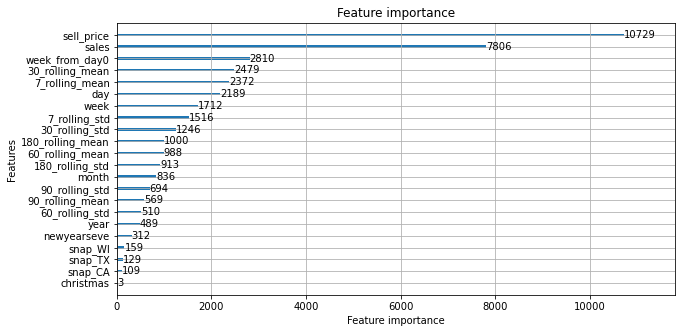

In [79]:
fig, ax = plt.subplots(figsize=(10,5))
lgb.plot_importance(model,ax=ax)

## Uncertainty  <a name="point3b"></a>

In [ ]:
def get_ratios(coef=0.15):
    quantile2 = np.log(quantile/(1-quantile))*coef
    ratios = stats.norm.cdf(quantile2)
    ratios /= ratios[4]
    ratios = pd.Series(ratios, index=quantile)
    return ratios.round(3)

def quantile_coefs(q, level):
    ratios = level_coef_dict[level]
               
    return ratios.loc[q].values

def get_group_preds(pred, level):
    df = pred.groupby(level)[cols].sum()
    q = np.repeat(quantile, len(df))
    df = pd.concat([df]*9, axis=0, sort=False)
    df.reset_index(inplace = True)
    df[cols] *= quantile_coefs(q, level)[:, None]
    if level != "id":
        df["id"] = [f"{lev}_X_{q:.3f}_validation" for lev, q in zip(df[level].values, q)]
    else:
        df["id"] = [f"{lev.replace('_validation', '')}_{q:.3f}_validation" for lev, q in zip(df[level].values, q)]
    df = df[["id"]+list(cols)]
    return df

def get_couple_group_preds(pred, level1, level2):
    df = pred.groupby([level1, level2])[cols].sum()
    q = np.repeat(quantile, len(df))
    df = pd.concat([df]*9, axis=0, sort=False)
    df.reset_index(inplace = True)
    df[cols] *= quantile_coefs(q, (level1, level2))[:, None]
    df["id"] = [f"{lev1}_{lev2}_{q:.3f}_validation" for lev1,lev2, q in zip(df[level1].values,df[level2].values, q)]
    df = df[["id"]+list(cols)]
    return df

In [56]:
import scipy.stats as stats

#use  the original df
valid_df = pd.read_csv('sales_train_validation.csv')
#use the previous final df again
sub = final.merge(valid_df[["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"]], on = "id")
sub["_all_"] = "Total"


quantile = np.array([0.005, 0.025, 0.165, 0.25, 0.5, 0.75, 0.835, 0.975, 0.995])



level_coef_dict = {"id": get_ratios(coef=0.3), "item_id": get_ratios(coef=0.15),
                   "dept_id": get_ratios(coef=0.05), "cat_id": get_ratios(coef=0.09),
                   "store_id": get_ratios(coef=0.1), "state_id": get_ratios(coef=0.08),
                   "_all_": get_ratios(coef=0.05),
                   ("state_id", "item_id"): get_ratios(coef=0.19),  ("state_id", "dept_id"): get_ratios(coef=0.1),
                    ("store_id","dept_id") : get_ratios(coef=0.11), ("state_id", "cat_id"): get_ratios(coef=0.08),
                    ("store_id","cat_id"): get_ratios(coef=0.1)
                  }


levels = ["id", "item_id", "dept_id", "cat_id", "store_id", "state_id", "_all_"]
couples = [("state_id", "item_id"),  ("state_id", "dept_id"), ("store_id","dept_id"), ("state_id", "cat_id"), ("store_id","cat_id")]
cols = [f"F{i}" for i in range(1, 29)]

df = []
for level in levels :
    df.append(get_group_preds(sub, level))
for level1,level2 in couples:
    df.append(get_couple_group_preds(sub, level1, level2))
df = pd.concat(df, axis=0, sort=False)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df,df] , axis=0, sort=False)
df.reset_index(drop=True, inplace=True)
df.loc[df.index >= len(df.index)//2, "id"] = df.loc[df.index >= len(df.index)//2, "id"].str.replace("_validation$", "_evaluation")

df
#df.to_csv("submission_2.csv", index = False)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_0.005_validation,0.219122,0.117186,0.116334,-0.000392,0.458052,-0.000399,-0.000303,0.457460,0.117761,...,0.001899,0.219675,0.001596,0.460787,0.116427,0.117294,0.000774,0.115918,0.117056,0.001544
1,FOODS_1_001_CA_2_0.005_validation,-0.000245,0.000796,0.000818,0.002154,0.002353,0.004991,0.004991,0.112308,0.111291,...,0.111601,0.003962,1.537686,0.004783,0.113316,0.112563,0.454511,0.001232,0.001740,0.454659
2,FOODS_1_001_CA_3_0.005_validation,0.005149,0.005465,0.110259,0.004996,0.004212,0.108771,0.001880,0.001126,0.001037,...,0.000997,-0.000454,1.470311,0.003277,0.002265,0.003317,0.003809,0.003056,0.113712,0.006701
3,FOODS_1_001_CA_4_0.005_validation,0.219410,-0.001006,-0.001006,-0.001006,-0.000895,-0.000895,-0.000895,0.118868,0.000262,...,-0.000918,-0.000829,-0.000829,0.220064,-0.000829,-0.000829,-0.000829,0.118784,0.119137,0.119137
4,FOODS_1_001_TX_1_0.005_validation,-0.000205,-0.000290,-0.000219,-0.000219,-0.000219,-0.000219,-0.000021,-0.000021,0.115432,...,0.000279,0.002223,0.002399,0.002670,0.002399,0.002399,0.000455,0.002670,0.002381,0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771115,WI_2_HOBBIES_0.995_evaluation,472.798020,370.615941,322.339195,458.460776,558.809910,415.640555,440.199916,419.434701,342.253399,...,416.719157,451.579012,455.317866,393.111412,348.130400,380.797034,386.355026,423.002935,406.258328,335.502951
771116,WI_2_HOUSEHOLD_0.995_evaluation,1476.114997,1414.039808,1181.305510,1367.796482,2859.132672,2368.537307,2011.849480,1425.003354,1484.396522,...,1581.926063,1522.106475,1529.763505,1187.090460,1303.998438,1276.749360,1459.771035,1786.803212,1930.400916,1736.695203
771117,WI_3_FOODS_0.995_evaluation,2875.448818,3484.930421,2895.382308,2844.169796,3817.606353,5252.242274,5624.494963,3543.643600,4166.390289,...,4811.046542,5046.084781,4669.207347,3686.686174,3378.235672,3196.874477,3263.521496,3788.010834,4513.987784,4444.843867
771118,WI_3_HOBBIES_0.995_evaluation,303.877171,307.949273,240.669756,415.367436,538.451222,470.179223,406.936944,391.656866,320.572343,...,475.891341,565.974501,349.798167,242.179946,381.044498,339.926123,289.382757,409.517465,573.349122,355.067952
